# Experiments on synthetic data

In [1]:
%load_ext autoreload

%autoreload 2

Required imports

In [2]:
import numpy as np
import pickle
import torch

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from utils.train_synthetic import run_synthetic_experiments, load_synthetic_results
from utils.results import *

In [3]:
BASELINES = ['QRNN', 'DPRNN', 'CFRNN', 'AdaptiveCFRNN']

# Static noise profile

In [38]:
for baseline in ['CFRNN', 'AdaptiveCFRNN', 'QRNN', 'DPRNN']:
    for seed in range(5):
        run_synthetic_experiments(experiment='static', 
                                  baseline=baseline,
                                  n_train = 2000,
                                  retrain_auxiliary=True,
                                  recompute_dataset=True,
                                  save_model=True, 
                                  save_results=True,
                                  rnn_mode='LSTM',
                                  seed=seed)

Training CFRNN
Training dataset 0
Epoch: 0	Train loss: 81.24044494628906
Epoch: 50	Train loss: 9.250524425506592
Epoch: 100	Train loss: 9.006788682937621
Epoch: 150	Train loss: 8.388805389404297
Epoch: 200	Train loss: 7.657482576370239
Epoch: 250	Train loss: 7.34607081413269
Epoch: 300	Train loss: 7.26207537651062
Epoch: 350	Train loss: 6.29205093383789
Epoch: 400	Train loss: 5.312899732589722
Epoch: 450	Train loss: 5.130415296554565
Epoch: 500	Train loss: 4.849606561660766
Epoch: 550	Train loss: 5.5908119678497314
Epoch: 600	Train loss: 4.363440227508545
Epoch: 650	Train loss: 4.283811330795288
Epoch: 700	Train loss: 6.369759798049927
Epoch: 750	Train loss: 4.4529987335205075
Epoch: 800	Train loss: 4.771352291107178
Epoch: 850	Train loss: 4.807813453674316
Epoch: 900	Train loss: 4.194506573677063
Epoch: 950	Train loss: 7.1635761737823485
Training dataset 1
Epoch: 0	Train loss: 83.23585433959961
Epoch: 50	Train loss: 8.845319700241088
Epoch: 100	Train loss: 8.229940462112427
Epoch: 150

**Joint coverage** 

Prints mean joint coverage across the horizon (mean±std of 5 random seeds, with each row indicating a different dataset)

In [40]:
for baseline in ['CFRNN', 'AdaptiveCFRNN', 'QRNN', 'DPRNN']:
    print(baseline)
    coverages_mean, coverages_std = get_joint_coverages(baseline, 'static', seeds=range(5))
    
    for m, s in zip(coverages_mean, coverages_std):
        print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(m, s))
    print()

CFRNN
92.8 \(\pm\) 0.8\%
94.0 \(\pm\) 0.4\%
94.6 \(\pm\) 1.6\%
94.3 \(\pm\) 1.4\%
94.3 \(\pm\) 1.4\%

AdaptiveCFRNN
93.6 \(\pm\) 0.4\%
94.7 \(\pm\) 1.0\%
93.6 \(\pm\) 0.3\%
94.2 \(\pm\) 1.3\%
93.7 \(\pm\) 1.1\%

QRNN
65.0 \(\pm\) 2.7\%
65.6 \(\pm\) 3.4\%
66.4 \(\pm\) 1.9\%
65.2 \(\pm\) 4.4\%
67.2 \(\pm\) 1.6\%

DPRNN
5.4 \(\pm\) 0.5\%
5.6 \(\pm\) 1.0\%
5.0 \(\pm\) 0.9\%
4.7 \(\pm\) 1.0\%
4.2 \(\pm\) 1.0\%



In [42]:
for baseline in ['CFRNN', 'DPRNN', 'QRNN']:
    print(baseline)
    widths_mean, widths_std = get_interval_widths(baseline, 'static', seeds=range(5))
    
    print(widths_mean)
    print(widths_std)

    print()

CFRNN
[16.44722347 16.96501667 17.11944893 17.34209549 16.96876431]
[3.69449142 3.34230051 3.50004207 3.76909034 3.27203236]

DPRNN
[2.82013162 2.94538281 2.77061952 2.87406446 2.8536792 ]
[0.33138791 0.3700536  0.36804268 0.35106769 0.38050776]

QRNN
[9.47492119 9.63299967 9.72052855 9.71000792 9.8446781 ]
[1.99090573 1.84661966 1.91620127 1.80339317 1.98716116]



## Time-dependent noise profile

Training procedure for CF-RNN/MQ-RNN/DP-RNN baselines (for 5 different seeds):

In [43]:
for baseline in ['CFRNN', 'AdaptiveCFRNN', 'QRNN', 'DPRNN']:
    for seed in range(5):
        run_synthetic_experiments(experiment='time_dependent', 
                                  baseline=baseline,
                                  n_train = 2000,
                                  retrain_auxiliary=True,
                                  save_model=True, 
                                  save_results=True,
                                  rnn_mode='LSTM',
                                  seed=seed)

Training CFRNN
Training dataset 0
Epoch: 0	Train loss: 84.4234619140625
Epoch: 50	Train loss: 12.888644886016845
Epoch: 100	Train loss: 12.360594844818115
Epoch: 150	Train loss: 11.653214836120606
Epoch: 200	Train loss: 10.932942295074463
Epoch: 250	Train loss: 10.140926742553711
Epoch: 300	Train loss: 9.618991374969482
Epoch: 350	Train loss: 9.163879299163819
Epoch: 400	Train loss: 9.026247692108154
Epoch: 450	Train loss: 9.197303104400635
Epoch: 500	Train loss: 8.01125636100769
Epoch: 550	Train loss: 7.914232587814331
Epoch: 600	Train loss: 11.86298589706421
Epoch: 650	Train loss: 8.87921862602234
Epoch: 700	Train loss: 8.349535036087037
Epoch: 750	Train loss: 8.381713342666625
Epoch: 800	Train loss: 8.599508285522461
Epoch: 850	Train loss: 7.528670167922973
Epoch: 900	Train loss: 7.006804084777832
Epoch: 950	Train loss: 8.182713890075684
Training dataset 1
Epoch: 0	Train loss: 95.2811279296875
Epoch: 50	Train loss: 22.429939651489256
Epoch: 100	Train loss: 21.807165718078615
Epoch: 

**Joint coverage**

Prints mean joint coverage across the horizon (mean±std of 5 random seeds, with each row indicating a different dataset)

In [44]:
for baseline in ['CFRNN', 'AdaptiveCFRNN', 'QRNN', 'DPRNN']:
    print(baseline)
    coverages_mean, coverages_std = get_joint_coverages(baseline, 'time_dependent', seeds=range(5))
    
    for m, s in zip(coverages_mean, coverages_std):
        print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(m, s))
    print()

CFRNN
92.7 \(\pm\) 1.3\%
92.4 \(\pm\) 0.9\%
90.9 \(\pm\) 1.3\%
90.6 \(\pm\) 1.2\%
91.1 \(\pm\) 0.7\%

AdaptiveCFRNN
93.3 \(\pm\) 1.2\%
92.2 \(\pm\) 1.3\%
73.0 \(\pm\) 36.5\%
73.1 \(\pm\) 36.6\%
71.8 \(\pm\) 35.9\%

QRNN
63.4 \(\pm\) 1.5\%
60.9 \(\pm\) 1.9\%
57.2 \(\pm\) 2.1\%
57.1 \(\pm\) 3.7\%
58.6 \(\pm\) 2.1\%

DPRNN
2.5 \(\pm\) 1.1\%
0.4 \(\pm\) 0.2\%
0.3 \(\pm\) 0.2\%
0.0 \(\pm\) 0.1\%
0.1 \(\pm\) 0.1\%



**Interval widths**

Prints the baseline; mean±std of interval width across horizons; rows denote the noise configuration and columns the random seed. 

In [45]:
for baseline in ['DPRNN', 'QRNN', 'CFRNN']:
    print(baseline)
    widths_mean, widths_std = get_interval_widths(baseline, 'time_dependent', seeds=range(5))
    
    print(widths_mean)
    print(widths_std)
    print()

DPRNN
[3.00985921 3.15200905 3.61740711 3.90813865 4.1496137 ]
[0.34551701 0.36768923 0.33066735 0.45235852 0.5694045 ]

QRNN
[11.50354813 15.44970139 20.04709633 25.0206823  30.54797958]
[1.6591085  1.67649736 2.01640179 2.11082111 2.54060492]

CFRNN
[19.7960812  25.74499092 32.69791679 40.74310669 48.99946655]
[3.60788834 3.31963515 3.96637649 4.1038651  5.57762702]



# Sample complexity

In [28]:
for baseline in ['DPRNN', 'QRNN', 'CFRNN']:
    for seed in range(1):
        run_synthetic_experiments(experiment='sample_complexity', 
                                  baseline=baseline,
                                  retrain_auxiliary=True,
                                  save_model=True, 
                                  save_results=True,
                                  rnn_mode='LSTM',
                                  seed=seed)

Training DPRNN
Training dataset 0
Epoch:  0 | train loss: 10.5556
Epoch:  1 | train loss: 7.9259
Epoch:  2 | train loss: 5.6957
Epoch:  3 | train loss: 6.0963
Epoch:  4 | train loss: 6.9604
Epoch:  5 | train loss: 5.4680
Epoch:  6 | train loss: 6.0883
Epoch:  7 | train loss: 5.0417
Epoch:  8 | train loss: 3.7989
Epoch:  9 | train loss: 5.1126
Training dataset 1
Epoch:  0 | train loss: 11.6278
Epoch:  1 | train loss: 11.1659
Epoch:  2 | train loss: 7.1649
Epoch:  3 | train loss: 9.0527
Epoch:  4 | train loss: 8.2037
Epoch:  5 | train loss: 6.6389
Epoch:  6 | train loss: 6.1422
Epoch:  7 | train loss: 8.5512
Epoch:  8 | train loss: 7.0019
Epoch:  9 | train loss: 6.2032
Training dataset 2
Epoch:  0 | train loss: 11.5287
Epoch:  1 | train loss: 15.5701
Epoch:  2 | train loss: 14.4515
Epoch:  3 | train loss: 12.5441
Epoch:  4 | train loss: 12.3198
Epoch:  5 | train loss: 12.1947
Epoch:  6 | train loss: 11.7064
Epoch:  7 | train loss: 10.4232
Epoch:  8 | train loss: 12.9222
Epoch:  9 | train

In [31]:
for baseline in ['DPRNN', 'QRNN', 'CFRNN']:
    print(baseline)
    coverages_mean, coverages_std = get_joint_coverages(baseline, 'sample_complexity', seeds=range(5))
    
    for m, s in zip(coverages_mean, coverages_std):
        print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(m, s))
    print()

DPRNN
6.0 \(\pm\) 8.0\%
5.8 \(\pm\) 3.5\%
3.6 \(\pm\) 0.6\%
1.1 \(\pm\) 0.2\%

QRNN
0.0 \(\pm\) 0.0\%
4.2 \(\pm\) 1.2\%
54.7 \(\pm\) 2.4\%
67.6 \(\pm\) 0.7\%

CFRNN
60.0 \(\pm\) 16.7\%
94.4 \(\pm\) 4.3\%
93.2 \(\pm\) 1.2\%
92.6 \(\pm\) 0.4\%



In [35]:
for baseline in ['DPRNN', 'QRNN', 'CFRNN']:
    print(baseline)
    widths_mean, widths_std = get_interval_widths(baseline, 'sample_complexity', seeds=range(5))
    
    print(widths_mean)
    print(widths_std)
    print()

DPRNN
[4.9435079  4.91403866 3.66253467 2.25822444]
[1.33484906 0.41153536 0.2735284  0.33487339]

QRNN
[ 0.78771722  4.74291252 10.8338064  11.90018562]
[0.87484591 0.97409898 1.54388235 1.81286484]

CFRNN
[16.2657159  23.71135349 21.04365135 17.35642841]
[5.37997023 4.26279014 3.54724386 2.62391159]



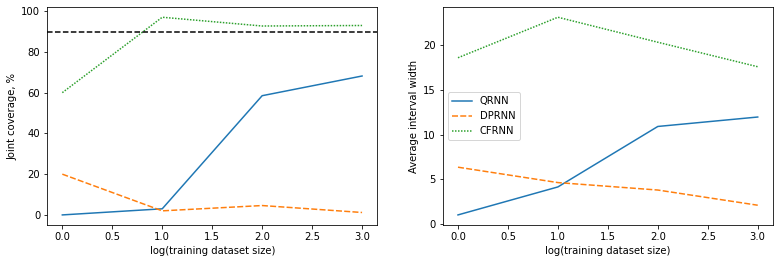

In [41]:
coverages_mean, coverages_std = {}, {}
for baseline in ['QRNN', 'DPRNN', 'CFRNN']:
    coverages_mean[baseline], coverages_std[baseline] = \
        get_joint_coverages(baseline, 'sample_complexity', seeds=[0])
    
widths_mean = {}
for baseline in ['QRNN', 'DPRNN', 'CFRNN']:
    widths_mean[baseline], _ = \
        get_interval_widths(baseline, 'sample_complexity', seeds=[0])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

figa = sns.lineplot(ax=ax1, data=coverages_mean, legend=None)
figa.axhline(90, linestyle="--", color="black")
figa.set(xlabel="log(training dataset size)", ylabel="Joint coverage, %")
    
figb = sns.lineplot(ax=ax2, data=widths_mean)
figb.set(xlabel="log(training dataset size)", ylabel="Average interval width")
plt.show()
fig.savefig('{}.png'.format('sample_complexity'), bbox_inches='tight', dpi=600)

## Plotting

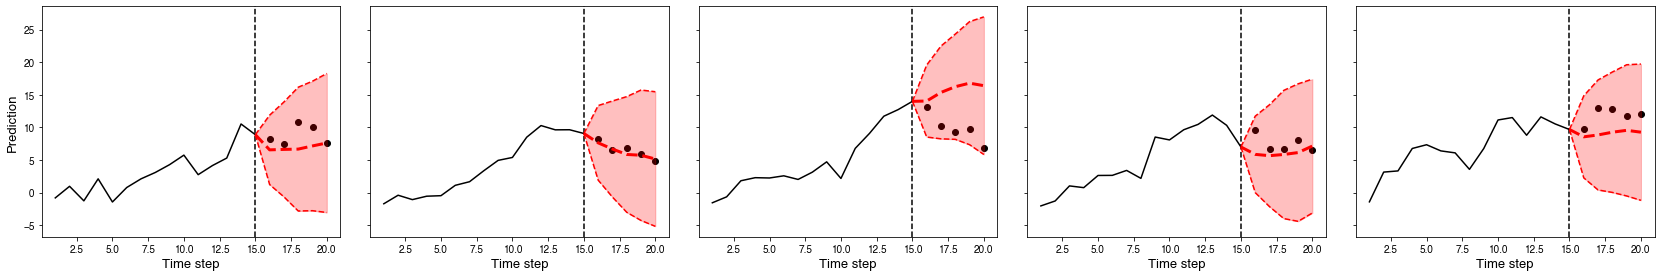

In [46]:
plot_timeseries(experiment='static', baseline='CFRNN', index=range(6,7), figure_name='CFRNN_static')

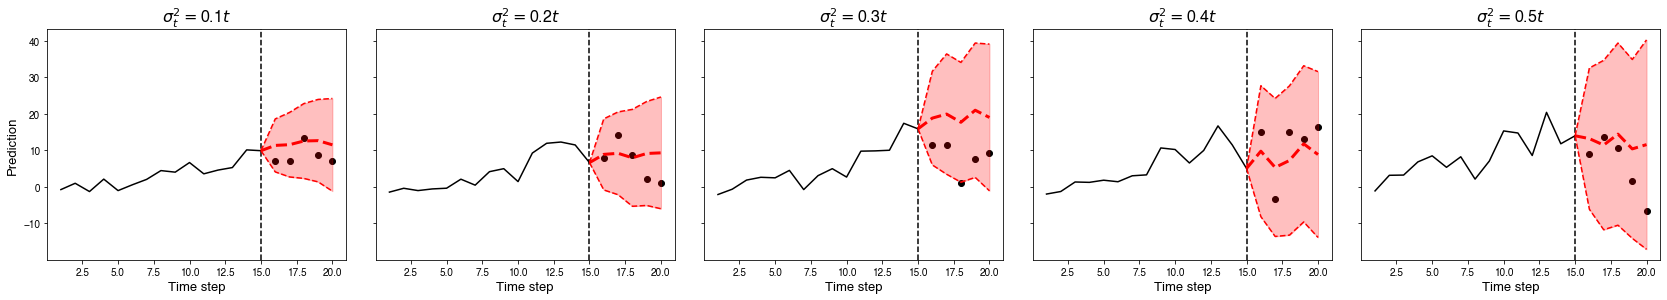

In [47]:
plot_timeseries(experiment='time_dependent', baseline='CFRNN', index=range(6,7), figure_name='CFRNN_time_dependent')

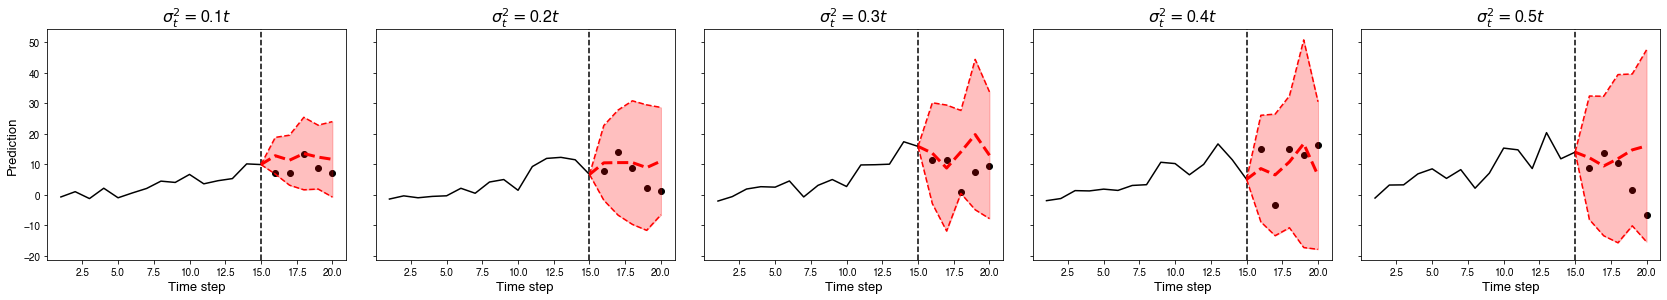

In [48]:
plot_timeseries(experiment='time_dependent', baseline='AdaptiveCFRNN', index=range(6,7), figure_name='CFRNN_adaptive')

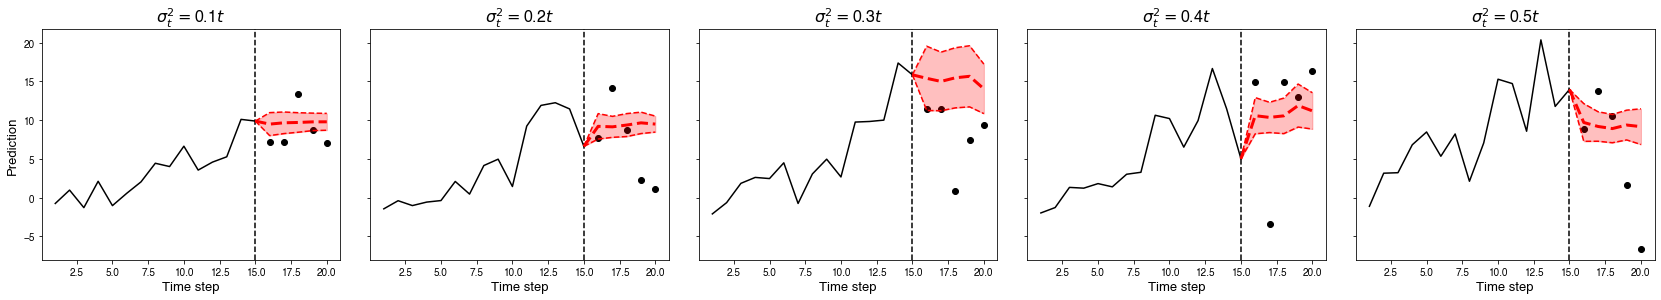

In [25]:
plot_timeseries(experiment='time_dependent', baseline='DPRNN', index=range(6,7), figure_name='DPRNN')

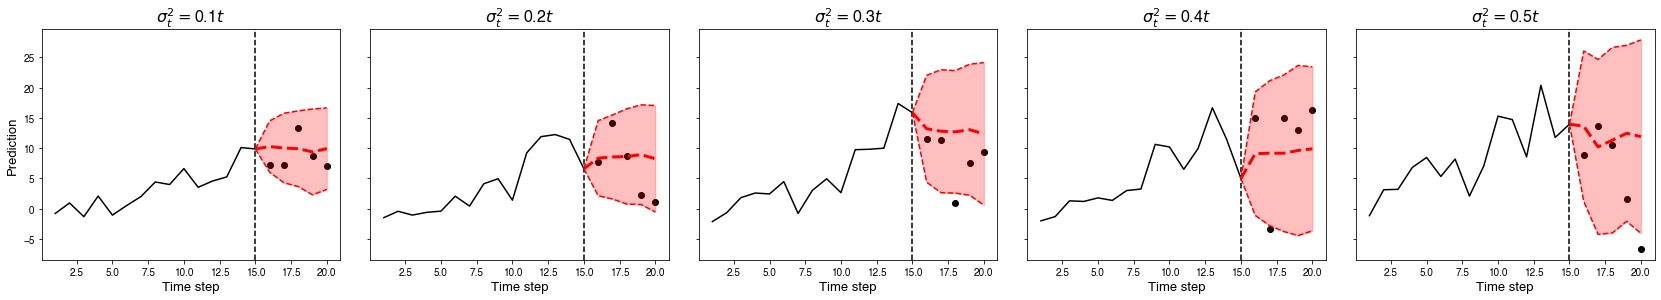

In [27]:
plot_timeseries(experiment='time_dependent', baseline='QRNN', index=range(6,7), figure_name='MQRNN')

## Long horizon analysis (Figure 4)

Training code for the three underlying RNN models:

In [31]:
for rnn_mode in ['LSTM', 'RNN', 'GRU']:
    run_synthetic_experiments(experiment='static', 
                              baseline='CFRNN',
                              horizon=100,
                              retrain_auxiliary=True,
                              recompute_dataset=True,
                              save_model=True, 
                              save_results=False, 
                              rnn_mode=rnn_mode)

Training CFRNN
Training dataset 0
Epoch: 0	Train loss: 116.17800216674804
Epoch: 50	Train loss: 105.08755569458008
Epoch: 100	Train loss: 105.04140701293946
Epoch: 150	Train loss: 105.00509033203124
Epoch: 200	Train loss: 104.94557647705078
Epoch: 250	Train loss: 105.05139083862305
Epoch: 300	Train loss: 105.01086959838867
Epoch: 350	Train loss: 104.9856964111328
Epoch: 400	Train loss: 104.9906005859375
Epoch: 450	Train loss: 105.03883361816406
Epoch: 500	Train loss: 105.01057815551758
Epoch: 550	Train loss: 105.00690383911133
Epoch: 600	Train loss: 104.97871704101563
Epoch: 650	Train loss: 104.98605880737304
Epoch: 700	Train loss: 105.0848503112793
Epoch: 750	Train loss: 105.0183120727539
Epoch: 800	Train loss: 105.04076232910157
Epoch: 850	Train loss: 105.01460037231445
Epoch: 900	Train loss: 105.04418411254883
Epoch: 950	Train loss: 105.0252555847168
Training dataset 1
Epoch: 0	Train loss: 115.84004592895508
Epoch: 50	Train loss: 104.69863433837891
Epoch: 100	Train loss: 104.6138496

Analyzing interval widths:

In [33]:
import torch
widths = {}
n_train=2000
for rnn_model in ['LSTM', 'RNN', 'GRU']:
    model = torch.load('saved_models/static-CFRNN-{}-5-0-horizon100.pt'.format(rnn_model))
    
    ws = []
    alphas = np.arange(100) * 0.01
    for alpha in alphas:
        corrected_alpha = alpha / model.horizon
        corrected_critical_calibration_scores = torch.tensor([[
                torch.quantile(
                    position_calibration_scores,
                    q=1 - corrected_alpha * n_train / (n_train + 1))
                for position_calibration_scores in feature_calibration_scores]
                for feature_calibration_scores in model.calibration_scores]).T
        ws.append(corrected_critical_calibration_scores.flatten().tolist())
    ws = np.array(ws)
    ws = ws * 2
    widths[rnn_model] = ws

In [34]:
def compute_valid_horizons(threshold_width):
    valid_horizons = {}
    for rnn_model in ['LSTM', 'RNN', 'GRU']:    
        T = []
        ws = widths[rnn_model]
        for i, _ in enumerate(alphas):
            t = 0
            while t < ws.shape[1] and ws[i, t] < threshold_width:
                t += 1
            T.append(t)
        valid_horizons[rnn_model] = np.array(T)
    return valid_horizons

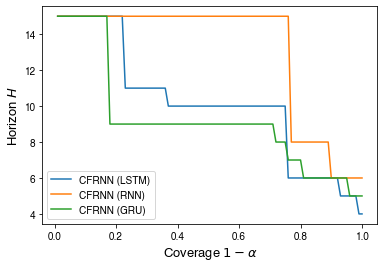

In [37]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({'axes.titlesize': 16,
                     'axes.labelsize': 13})
for threshold_width in [28]:
    valid_horizons = compute_valid_horizons(threshold_width)
    for rnn_model in valid_horizons.keys():
        plt.plot(1-alphas, valid_horizons[rnn_model], label='CFRNN ({})'.format(rnn_model))
plt.xlabel('Coverage $1-\\alpha$')
plt.ylabel('Horizon $H$')
plt.legend()
plt.savefig('{}.png'.format('tradeoff') , bbox_inches='tight', dpi=1000)
plt.show()